In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles

# making sure plots & clusters are reproducible
np.random.seed(42)

In [2]:
# directory paths
master_table = '/home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/GSE124685/211213_FC_IPF_stages_bulk_DGE_MASTER_table.csv'
data_dir = '/home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/GSE124685/'
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/02_figures/GSE124685_bulk_comparison/'

In [3]:
## plotting variables
plt.rcParams['figure.figsize'] = (8, 14)
plt.rcParams['pdf.fonttype'] = 42

In [4]:
## read master table
master = pd.read_csv(master_table, index_col=0)
master[master.isna()] = 0
master.head(5)

,ipf1_logFC,ipf1_adj_p_val,ipf2_logFC,ipf2_adj_p_val,ipf3_logFC,ipf3_adj_p_val,FC_logFC,FC_adj_p_val
A1BG,0.113428,0.731666,0.312365,0.286459,0.140477,0.935197,0.510958,0.999984
A2M,0.602106,0.319526,0.549137,0.494127,0.351658,0.867058,-0.580821,0.999984
A2ML1,0.109573,0.733621,0.043715,0.999976,0.037047,0.998974,-0.915168,0.000000
A4GALT,-0.064129,0.905067,0.200724,0.957387,0.214847,0.966702,0.916265,0.759586
A4GNT,0.120505,0.730561,0.041791,0.999976,0.009141,0.998974,-0.319549,0.000000


### Filter master table

In [5]:
fc_master = master[master.FC_adj_p_val < 1]
fc_up = fc_master[fc_master.FC_logFC > 0.0]
fc_down = fc_master[fc_master.FC_logFC < -0.0]

In [6]:
ipf1_master = master#[master.ipf1_adj_p_val < 0.1]
#ipf1_master[ipf1_master.isna()] = 0
ipf1_up = ipf1_master[ipf1_master.ipf1_logFC > 0.0]#.shape[0]
ipf1_down = ipf1_master[ipf1_master.ipf1_logFC < -0.0]#.shape[0]

In [7]:
ipf2_master = master#[master.ipf2_adj_p_val < 0.1]
#ipf2_master[ipf2_master.isna()] = 0
ipf2_up = ipf2_master[ipf2_master.ipf2_logFC > 0.0]#.shape[0]
ipf2_down = ipf2_master[ipf2_master.ipf2_logFC < -0.0]#.shape[0]

In [8]:
ipf3_master = master#[master.ipf3_adj_p_val < 0.1]
#ipf3_master[ipf3_master.isna()] = 0
ipf3_up = ipf3_master[ipf3_master.ipf3_logFC > 0.0]#.shape[0]
ipf3_down = ipf3_master[ipf3_master.ipf3_logFC < -0.0]#.shape[0]

### Summary table of pct shared between FC and IPF stages

In [9]:
pct_ipf1_up =  round(len(np.intersect1d(fc_up.index, ipf1_up.index)) / len(fc_up.index), 2)
pct_ipf2_up =  round(len(np.intersect1d(fc_up.index, ipf2_up.index)) / len(fc_up.index), 2)
pct_ipf3_up =  round(len(np.intersect1d(fc_up.index, ipf3_up.index)) / len(fc_up.index), 2)

In [10]:
pct_ipf1_down =  round(len(np.intersect1d(fc_down.index, ipf1_down.index)) / len(fc_down.index), 2)
pct_ipf2_down =  round(len(np.intersect1d(fc_down.index, ipf2_down.index)) / len(fc_down.index), 2)
pct_ipf3_down =  round(len(np.intersect1d(fc_down.index, ipf3_down.index)) / len(fc_down.index), 2)

In [11]:
data = {'stage' : ['IPF 1', 'IPF 2', 'IPF 3'],
        'pct_shared_up' : [pct_ipf1_up*100, pct_ipf2_up*100, pct_ipf3_up*100],
        'pct_shared_down' : [pct_ipf1_down*100, pct_ipf2_down*100, pct_ipf3_down*100]
}

In [12]:
pct_table = pd.DataFrame(data)
pct_table

,stage,pct_shared_up,pct_shared_down
0,IPF 1,69.0,33.0
1,IPF 2,59.0,42.0
2,IPF 3,57.0,43.0


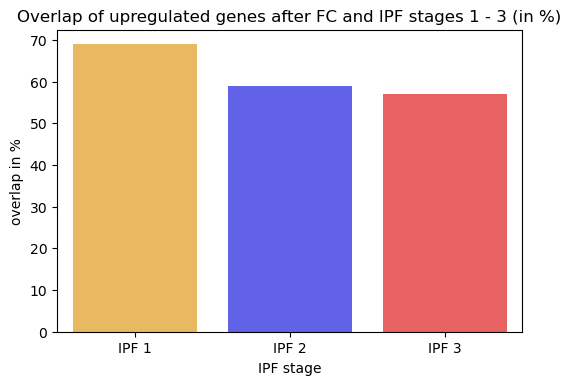

In [13]:
sb.barplot(data = data,
           x = 'stage',
           y = 'pct_shared_up',
           palette = ['#FFC04C','#4C4CFF','#FF4C4C'],
           ax = plt.figure(figsize=(6, 4), dpi = 100).gca()
          ).set(title='Overlap of upregulated genes after FC and IPF stages 1 - 3 (in %)',
                xlabel = 'IPF stage',
                ylabel = 'overlap in %'
               )
plt.savefig(fig_dir + 'barplot_pct_overlap_IPF_stages_up.pdf')
plt.show()

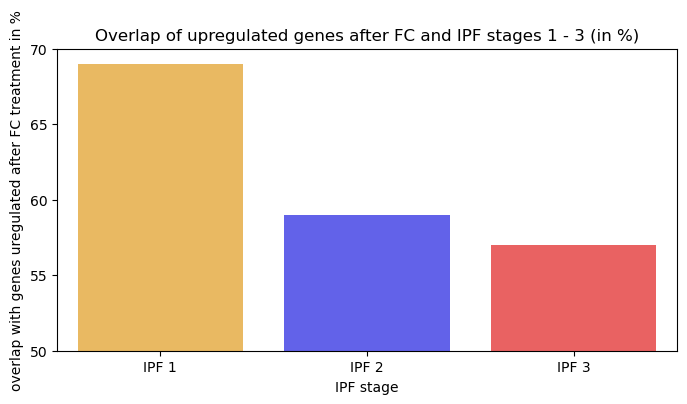

In [14]:
sb.barplot(data = data,
           x = 'stage',
           y = 'pct_shared_up',
           palette = ['#FFC04C','#4C4CFF','#FF4C4C'],
           ax = plt.figure(figsize=(8, 4), dpi = 100).gca()
          ).set(title='Overlap of upregulated genes after FC and IPF stages 1 - 3 (in %)',
                xlabel = 'IPF stage',
                ylabel = 'overlap with genes uregulated after FC treatment in %',
                ylim = (50, 70),
                yticks = [50,55,60,65,70]
               )
plt.savefig(fig_dir + 'barplot_pct_overlap_IPF_stages_up_zoom.pdf')
plt.show()

### Create Venn Diagramms - overlap of IPF stage signatures 

In [15]:
plt.rcParams['figure.figsize'] = (8, 14)

In [16]:
ipf1_up = master[(master.ipf1_adj_p_val < 0.05) & (master.ipf1_logFC > 0.5)]
ipf2_up = master[(master.ipf2_adj_p_val < 0.05) & (master.ipf2_logFC > 0.5)]
ipf3_up = master[(master.ipf3_adj_p_val < 0.05) & (master.ipf3_logFC > 0.5)]

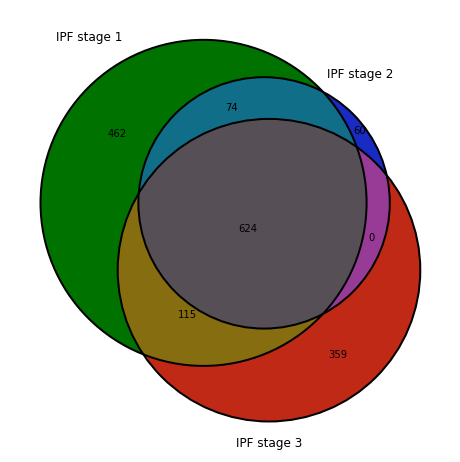

In [17]:
venn3(subsets=(len(np.setdiff1d(ipf1_up.index, np.union1d(ipf2_up.index, ipf3_up.index))),
               len(np.setdiff1d(ipf2_up.index, np.union1d(ipf1_up.index, ipf3_up.index))),
               len(np.setdiff1d(np.intersect1d(ipf1_up.index, ipf2_up.index), ipf3_up.index)),
               len(np.setdiff1d(ipf3_up.index, np.union1d(ipf1_up.index, ipf2_up.index))),
               len(np.setdiff1d(np.intersect1d(ipf1_up.index, ipf3_up.index), ipf2_up.index)),
               len(np.setdiff1d(np.intersect1d(ipf2_up.index, ipf3_up.index), ipf3_up.index)),
               len(np.intersect1d(ipf1_up.index, np.intersect1d(ipf2_up.index, ipf3_up.index)))),
      set_labels=('IPF stage 1', 'IPF stage 2', 'IPF stage 3'), 
      set_colors=("#007200", "#192BC2", "#C02915"), alpha=1)
venn3_circles(subsets=(ipf1_up.shape[0]-len(np.intersect1d(ipf1_up.index, np.union1d(ipf2_up.index, ipf3_up.index))),
               ipf2_up.shape[0]-len(np.intersect1d(ipf2_up.index, np.union1d(ipf1_up.index, ipf3_up.index))),
               len(np.setdiff1d(np.intersect1d(ipf1_up.index, ipf2_up.index), ipf3_up.index)),
               ipf3_up.shape[0]-len(np.intersect1d(ipf3_up.index, np.union1d(ipf1_up.index, ipf2_up.index))),
               len(np.setdiff1d(np.intersect1d(ipf1_up.index, ipf3_up.index), ipf2_up.index)),
               len(np.setdiff1d(np.intersect1d(ipf2_up.index, ipf3_up.index), ipf3_up.index)),
               len(np.intersect1d(ipf1_up.index, np.intersect1d(ipf2_up.index, ipf3_up.index)))),
              linewidth=2)
plt.savefig(fig_dir + 'overlap_IPF_stages_up.pdf')
plt.show()

In [18]:
## save unique IPF stages signatures for future use 
signatures = {
    'ipf1_up_unique' : list(np.setdiff1d(ipf1_up.index, np.union1d(ipf2_up.index, ipf3_up.index))),
    'ipf2_up_unique' : list(np.setdiff1d(ipf2_up.index, np.union1d(ipf1_up.index, ipf3_up.index))),
    'ipf3_up_unique' : list(np.setdiff1d(ipf3_up.index, np.union1d(ipf1_up.index, ipf2_up.index))),
    'ipf_shared' : list(np.intersect1d(ipf1_up.index, np.intersect1d(ipf2_up.index, ipf3_up.index))),
}

In [19]:
signatures_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in signatures.items() ]))

In [20]:
signatures_df.shape

(624, 4)

In [21]:
signatures_df.to_csv('/home/niklas/data/gene_lists/kaminski_IPF_stages_signature.csv')

### Recreate barplot from above but using only unique IPF stage signatures

In [22]:
ipf1_up = master[master.ipf1_logFC > 0]
ipf2_up = master[master.ipf2_logFC > 0]
ipf3_up = master[master.ipf3_logFC > 0]

In [23]:
ipf1_up_unique = list(np.setdiff1d(ipf1_up.index, np.union1d(ipf2_up.index, ipf3_up.index)))
ipf2_up_unique = list(np.setdiff1d(ipf2_up.index, np.union1d(ipf1_up.index, ipf3_up.index)))
ipf3_up_unique = list(np.setdiff1d(ipf3_up.index, np.union1d(ipf1_up.index, ipf2_up.index)))
ipf_shared = list(np.intersect1d(ipf1_up.index, np.intersect1d(ipf2_up.index, ipf3_up.index)))

In [24]:
pct_ipf1_up =  round(len(np.intersect1d(fc_up.index, ipf1_up_unique)) / len(fc_up.index), 2)
pct_ipf2_up =  round(len(np.intersect1d(fc_up.index, ipf2_up_unique)) / len(fc_up.index), 2)
pct_ipf3_up =  round(len(np.intersect1d(fc_up.index, ipf3_up_unique)) / len(fc_up.index), 2)
pct_ipf_shared_up =  round(len(np.intersect1d(fc_up.index, ipf_shared)) / len(fc_up.index), 2)

In [25]:
data = {'stage' : ['IPF stage 1 unique', 'IPF stage 2 unique', 'IPF stage 3 unique', 'shared IPF'],
        'pct_shared_up' : [pct_ipf1_up*100, pct_ipf2_up*100, pct_ipf3_up*100, pct_ipf_shared_up*100],
}

In [26]:
pct_table = pd.DataFrame(data)
pct_table

,stage,pct_shared_up
0,IPF stage 1 unique,11.0
1,IPF stage 2 unique,1.0
2,IPF stage 3 unique,2.0
3,shared IPF,46.0


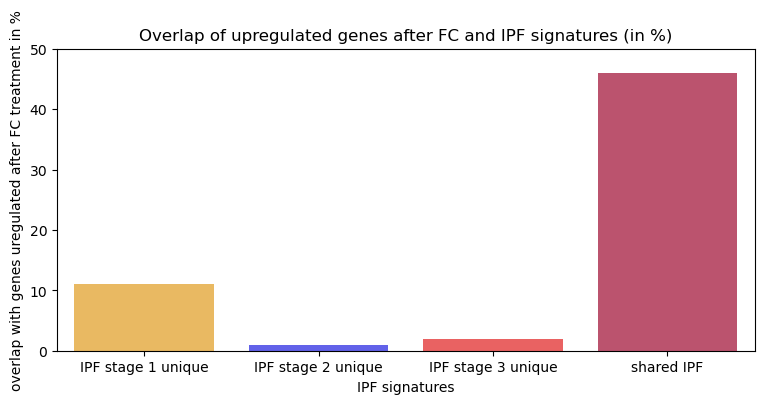

In [27]:
sb.barplot(data = pct_table,
           x = 'stage',
           y = 'pct_shared_up',
           palette = ['#FFC04C','#4C4CFF','#FF4C4C','#CC4266'],
           ax = plt.figure(figsize=(9, 4), dpi = 100).gca()
          ).set(title='Overlap of upregulated genes after FC and IPF signatures (in %)',
                xlabel = 'IPF signatures',
                ylabel = 'overlap with genes uregulated after FC treatment in %',
                ylim = (0,50),
                yticks = [0,10,20,30,40,50]
               )
plt.savefig(fig_dir + 'barplot_pct_overlap_unique_IPF_stage_signatures_up.pdf')
plt.show()